<a href="https://colab.research.google.com/github/ahn283/finance/blob/main/tensorflow_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 학습 코드를 실행하기 전에 <b>[런타임]</b> - <b>[런타임 유형 변경]</b>에서 하드웨어 가속기를 <b>[GPU]</b>로 설정한다.

### <b>데이터 세트 다운로드</b>

* 딥러닝 모델 학습 과정에서 필요한 데이터 세트를 불러온다.

In [1]:
!git clone https://github.com/ndb796/weather_dataset
%cd weather_dataset

Cloning into 'weather_dataset'...
remote: Enumerating objects: 1117, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1117 (delta 0), reused 3 (delta 0), pack-reused 1111
Receiving objects: 100% (1117/1117), 85.23 MiB | 33.56 MiB/s, done.
/content/weather_dataset


### <b>라이브러리 불러오기(Load Libraries)</b>

* 딥러닝 모델 학습 과정에서 필요한 라이브러리를 불러온다.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

### <b>데이터 세트 불러오기(Load Dataset)</b>

1. <b>데이터 증진(data augmentation)</b>을 명시하여 초기화할 수 있다.
  * 이미지를 불러올 때 어떤 방법(회전, 자르기, 뒤집기 등)을 사용할 것인지 명시한다.
2. 이후에 <b>flow()</b>를 이용하여 실질적으로 데이터를 불러올 수 있다.
  * 어떤 데이터를 사용할 것인지, 배치 크기(batch size), 데이터 셔플(shuffle) 여부 등을 명시한다.
  * <b>next() 함수</b>를 이용하여 numpy array 형태로 데이터를 배치 단위로 얻을 수 있다.
* <b>Reference</b>: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset

In [4]:
train_generator = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    validation_split=0.2
)
test_generator = ImageDataGenerator(rescale=1/255.)

train_flow = train_generator.flow_from_directory(
    directory='train/',
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    subset='training'
)
val_flow = train_generator.flow_from_directory(
    directory='train/',
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    subset='validation'
)
test_flow = test_generator.flow_from_directory(
    directory='test/',
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

Found 676 images belonging to 4 classes.
Found 168 images belonging to 4 classes.
Found 281 images belonging to 4 classes.


### <b>데이터 시각화(Data Visualization)</b>

['Rain', 'Cloudy', 'Sunrise', 'Cloudy']


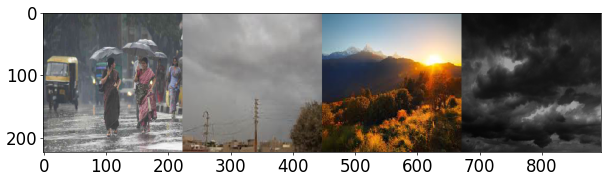

In [7]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

class_names = {
    0: 'Cloudy',
    1: 'Rain',
    2: 'Shine',
    3: 'Sunrise'
}

images, targets = next(train_flow)

print([class_names[x] for x in np.argmax(targets[:4], axis=1)])
plt.imshow(np.concatenate((images[0], images[1], images[2], images[3]), axis=1))
plt.show()

### <b>딥러닝 모델 학습(Training)</b>

* 자신이 직접 정의한 뉴럴 네트워크를 이용하여 데이터 세트에 대한 학습이 가능하다.
  * 레이어의 깊이를 늘려 가며, 파라미터의 개수를 증가시킬 수 있다.

In [11]:
def get_model_1():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten()) # dimension: 224 * 224 * 3
    model.add(layers.Dense(4, activation='softmax'))
    return model

def get_model_2():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten()) # dimension: 224 * 224 * 3
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    return model

def get_model_3():
    model = Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten())   
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation='softmax'))
    return model

### <b>학습 결과 확인하기</b>

* 학습 결과를 시각화하여 정상적으로 모델이 학습되었는지 확인한다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
Total params: 602,116
Trainable params: 602,116
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
11/11 [==============================] - 12s 1s/step - loss: 80.4141 - accuracy: 0.3180 - val_loss: 72.7778 - val_accuracy: 0.4524
Epoch 2/20
11/11 [==============================] - 10s 928ms/step - loss: 50.8395 - accuracy: 0.4246 - val_loss: 86.6482 - val_accuracy: 0.4702
Epoch 3/20
11/11 [==============================] - 10s 961ms/step - loss: 34.4204 - accuracy: 0.5725 - val_loss: 27.1253 - val_accuracy: 0.5179
Epoch 4/20
11/11 [==============================] - 10s 898ms/step - loss: 32.5604 - accuracy: 0.5503 - val_loss: 30.2108 - val_accuracy: 0.5357
Epoch 5/20
11/11 [==============================] - 11s 953ms/step - loss: 28.2811 - accuracy: 0.5725 - val_loss: 37.9706 - val_accuracy: 0.5000
Epoch 6/20
11/11 [==============================] - 11s 948ms/step - loss: 20.9555 - accuracy: 0.6627 - val_loss: 55.8110 - val_accuracy: 0.6012
Epoch 7/20
11/11 [==============================] - 11s 991ms/step - loss: 19.4404 - accuracy: 0.6686 - val_loss: 18.2040 - val_accur

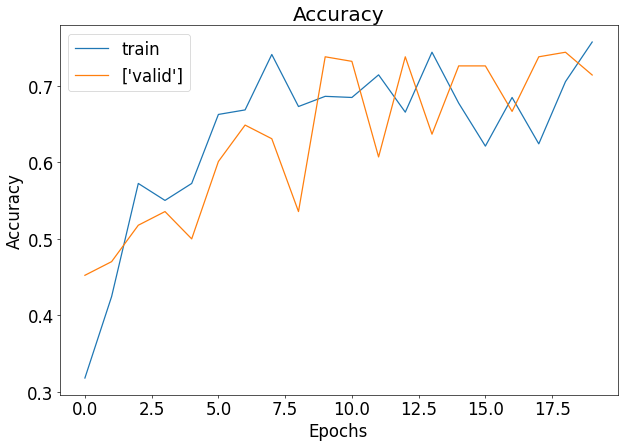

5/5 [==============================] - 1s 209ms/step - loss: 11.2298 - accuracy: 0.7544
Test loss: 11.22977448
Test accuracy: 75.44%


In [9]:
model_1 = get_model_1()
model_1.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_1.compile(
    optimizer=optimizers.SGD(lr=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 학습 수행
history = model_1.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', ['valid']])
plt.show()

# 학습된 모델 테스트
test_history = model_1.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f'Test loss: {test_loss:.8f}')
print(f'Test accuracy: {test_accuracy * 100.:.2f}%')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                9633856   
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 9,634,116
Trainable params: 9,634,116
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
11/11 [==============================] - 12s 1s/step - loss: 11.0873 - accuracy: 0.2781 - val_loss: 1.3534 - val_accuracy: 0.3452
Epoch 2/20
11/11 [==============================] - 10s 969ms/step - loss: 1.2270 - accuracy: 0.3994 - val_loss: 1.2553 - val_accuracy: 0.4286
Epoch 3/20
11/11 [==============================] - 11s 968ms/step - loss: 1.1890 - accuracy: 0.3979 - val_loss: 1.1791 - val_accuracy: 0.4583
Epoch 4/20
11/11 [==============================] - 11s 966ms/step - loss: 1.1748 - accuracy: 0.4527 - val_loss: 1.0254 - val_accuracy: 0.5476
Epoch 5/20
11/11 [==============================] - 11s 1s/step - loss: 1.0252 - accuracy: 0.5222 - val_loss: 1.0159 - val_accuracy: 0.5655
Epoch 6/20
11/11 [==============================] - 11s 1s/step - loss: 1.0216 - accuracy: 0.5385 - val_loss: 1.0146 - val_accuracy: 0.5357
Epoch 7/20
11/11 [==============================] - 11s 936ms/step - loss: 0.9980 - accuracy: 0.5355 - val_loss: 1.0057 - val_accuracy: 0.5417
Epoch 8

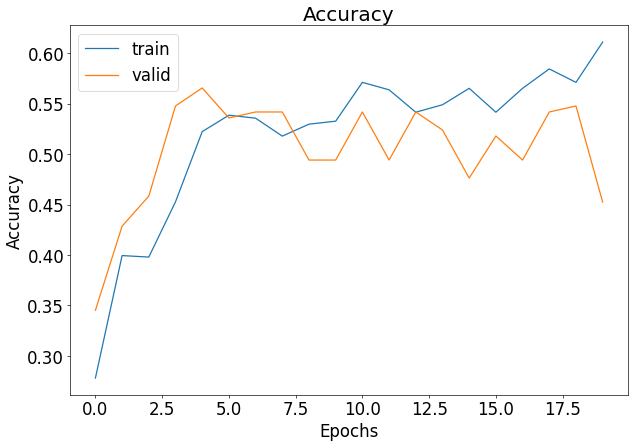

5/5 [==============================] - 1s 227ms/step - loss: 0.9113 - accuracy: 0.4840
Test loss: 0.91134918
Test accuracy: 48.40%


In [12]:
model_2 = get_model_2()
model_2.summary()
learning_rate = 0.01

# compile
model_2.compile(
    optimizer=optimizers.SGD(lr=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# fit datasets
history = model_2.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# evaluate test datasets
test_history = model_2.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f'Test loss: {test_loss:.8f}')
print(f'Test accuracy: {test_accuracy * 100.:.2f}%')

### <b>생각해 볼 거리</b>

* 더 파라미터의 수가 많고, 깊은 네트워크를 사용했음에도 정확도가 오히려 떨어지는 이유는?

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               19267712  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

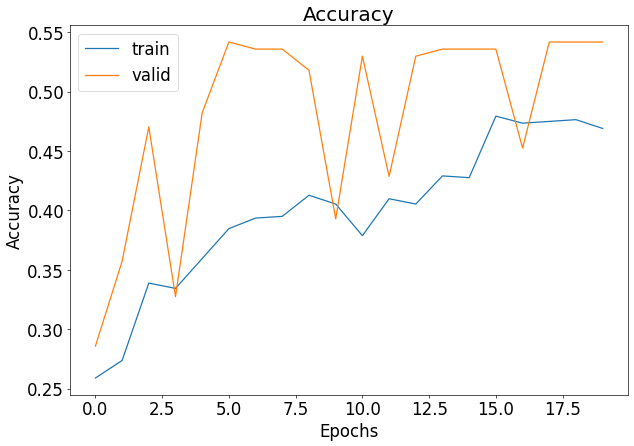

5/5 [==============================] - 1s 203ms/step - loss: 0.9611 - accuracy: 0.5694
Test loss: 0.9611036777496338:.8f
Test accuracy: 56.939501%


In [14]:
model_3 = get_model_3()
model_3.summary()
learning_rate = 0.01

# compile
model_3.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# fit datasets
history = model_3.fit(
    train_flow,
    epochs=20,
    validation_data=val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# evaluate test datasets
test_history = model_3.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f'Test loss: {test_loss}:.8f')
print(f'Test accuracy: {test_accuracy * 100.:2f}%')